# **k-Means Clustering**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

## k-Means 개요

k-means 알고리즘은 다차원 데이터셋을 정해진 개수의 클러스터로 분할한다.
이 알고리즘에서:

- '클러스터 중심'은 클러스터에 속하는 모든 포인트의 산술 평균이다.
- 각 포인트는 다른 클러스터 중심보다 자신의 클러스터 중심에 더 가깝다.

이 두 가지 가정이 k-means 모델의 기초이다.

먼저 4개의 별개의 포인트 군집으로 구성된 가상의 2차원 데이터셋을 생성해 보자.

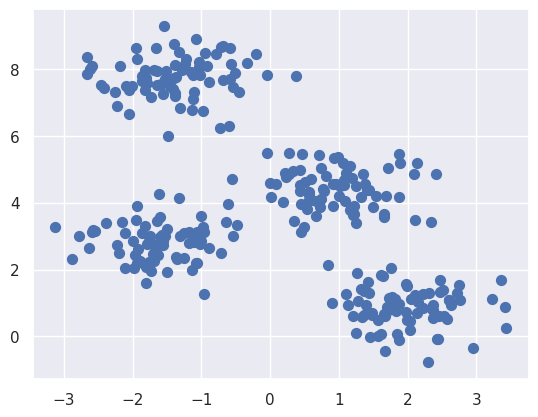

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


분류된 각 클러스터를 다른 색으로 시각화해보자. 또한 각 클러스터의 중심을 표시하였다.

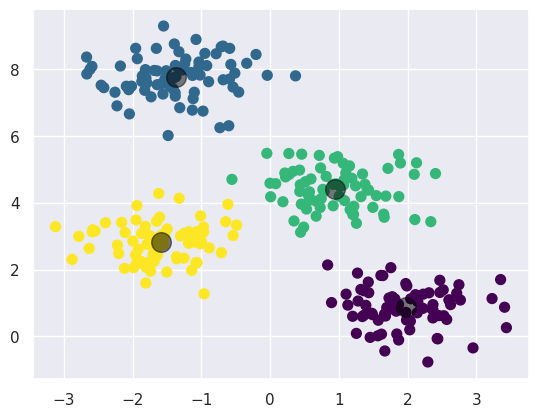

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### **예: k-means on digits**

숫자 손글씨 데이터에 k-means를 적용해보자.
먼저 숫자를 로드한 다음 ``KMeans`` 클러스터를 찾는다.
숫자는 8×8=64개의 특징이 있는 1,797개의 샘플로 구성된다.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

결과는 64차원의 10개의 클러스터이다. 클러스터 중심 자체는 64차원의 점이다. 이 클러스터 중심이 어떻게 생겼는지 살펴보자:

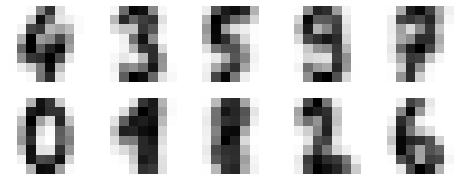

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### 예 2: *k*-means for color compression

클러스터링의 흥미로운 응용 분야 중 하나는 이미지 내의 색상 압축이다.
예를 들어 수백만 개의 색상이 있는 이미지가 있다고 가정해 보자.
대부분의 이미지에서 많은 수의 색상이 사용되지 않으며 이미지의 많은 픽셀이 비슷하거나 심지어 동일한 색상을 갖는다.

예를 들어, 다음 그림에 표시된 이미지는 Scikit-Learn '데이터 세트' 모듈에서 가져온 것이다(이 모듈이 작동하려면 'pillow' Python 패키지가 설치되어 있어야 한다).

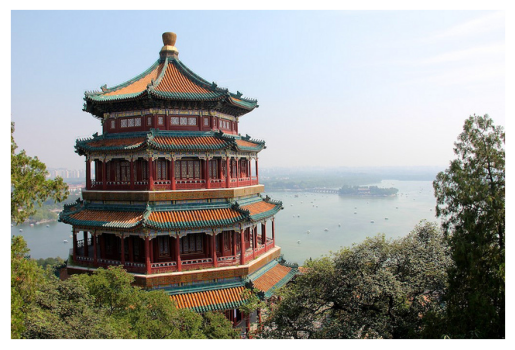

In [ ]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
china.shape

(427, 640, 3)

데이터를 `[n_samples x n_features]`로 재구성하고 색상을 0과 1 사이의 실수로 변환한다:

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

효율성을 위해 10,000개의 픽셀 부분집합의 색을 색 공간에서 시각화해보자:

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

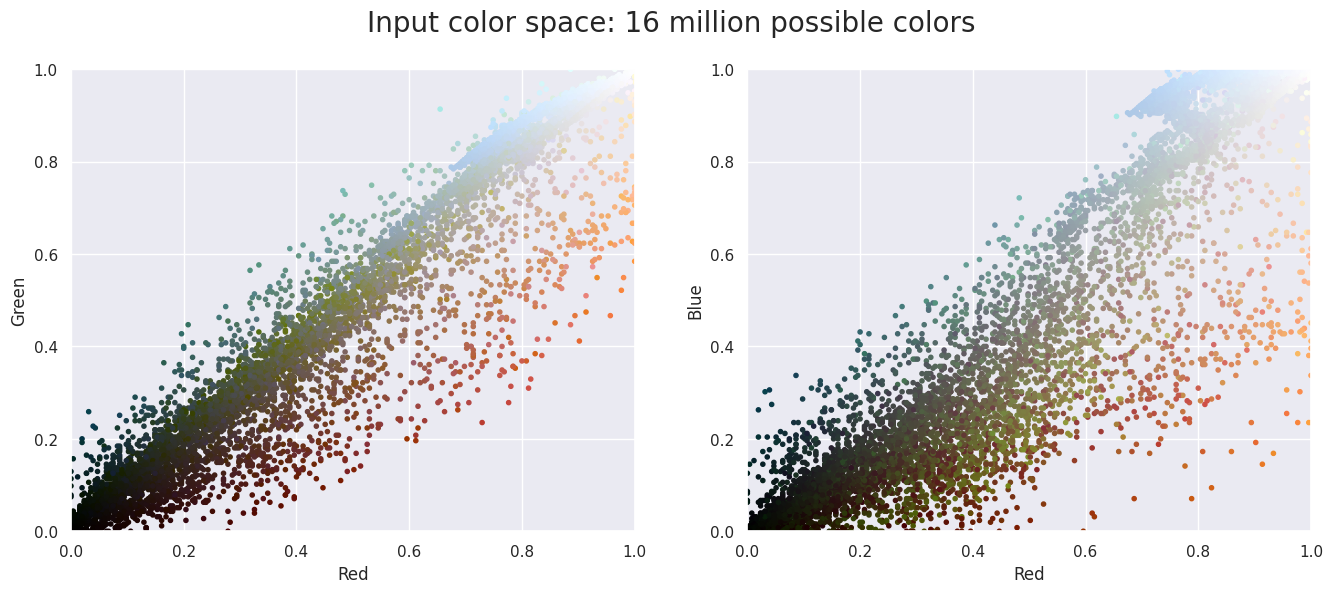

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

이제 픽셀 공간에 걸쳐 클러스터링하는 k-means를 사용하여 1,600만 개의 색상을 단 16개의 색상으로 줄여 보겠다.
매우 큰 데이터 집합을 다루기 때문에 데이터의 부분집합에서 작동하는 미니 배치 k-means를 사용하여 표준 k-means 알고리즘보다 훨씬 더 빠르게 결과를 계산한다:

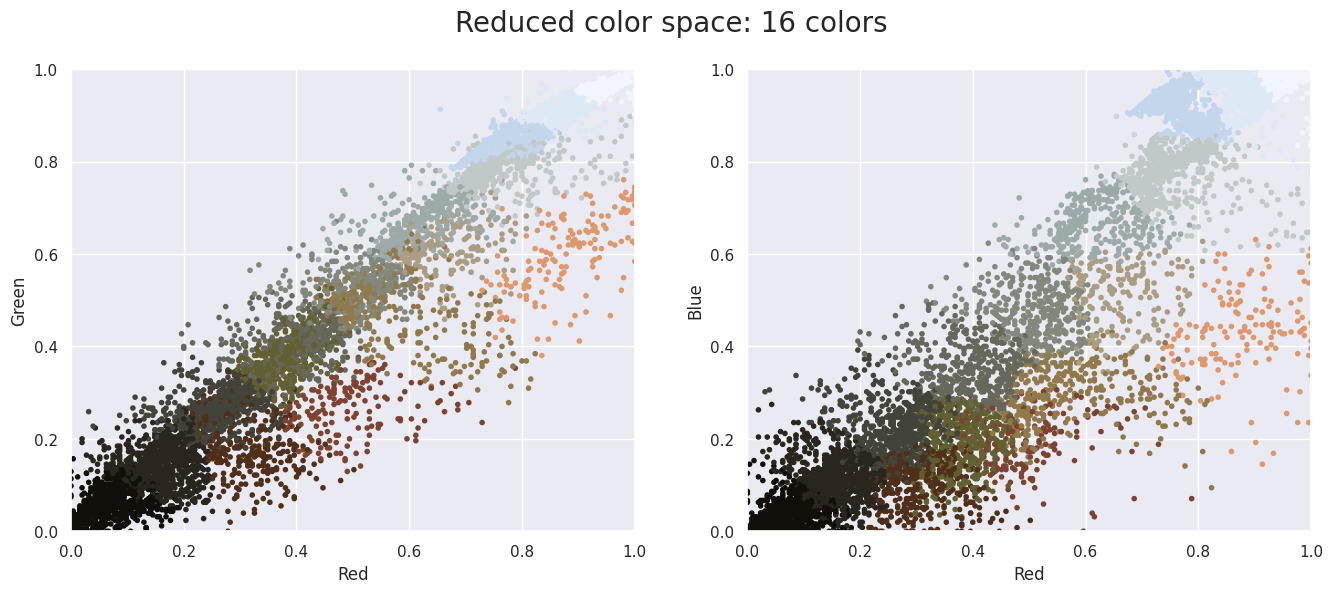

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

원본 픽셀의 색상이 다시 지정되고 각 픽셀에 가장 가까운 클러스터 중심의 색상이 할당된다. 이미지 공간에 이러한 새로운 색상을 플로팅하면 그 효과를 확인할 수 있다:

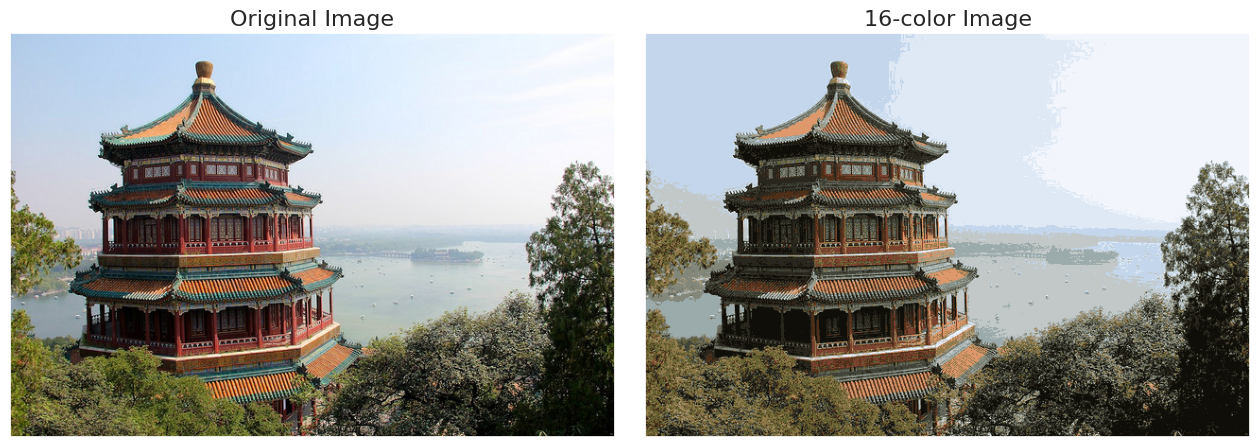

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

이미지의 오른쪽 부분에 일부 디테일이 손상되었지만 전체적인 이미지는 여전히 쉽게 알아볼 수 있다.
오른쪽의 이 이미지는 약 1백만 배의 압축률을 달성했다!